In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [6]:
ag_test_df = pd.read_csv("AG_train-test_v2.csv")
ag_target = ag_test_df["Survived"]
ag_test_df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0,22.0,1,0,0,0
1,1,1,1,1,38.0,1,0,0,1
2,2,1,3,1,26.0,0,0,0,0
3,3,1,1,1,35.0,1,0,0,0
4,4,0,3,0,35.0,0,0,0,0


In [7]:
ag_test_df.drop(labels=["Unnamed: 0", "Survived"], axis=1, inplace=True)
ag_test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,0,0
1,1,1,38.0,1,0,0,1
2,3,1,26.0,0,0,0,0
3,1,1,35.0,1,0,0,0
4,3,0,35.0,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(ag_test_df, ag_target, random_state=42)

k: 1, Train/Test Score: 0.957/0.672
k: 3, Train/Test Score: 0.958/0.729
k: 5, Train/Test Score: 0.958/0.695
k: 7, Train/Test Score: 0.958/0.712
k: 9, Train/Test Score: 0.958/0.712
k: 11, Train/Test Score: 0.958/0.706
k: 13, Train/Test Score: 0.958/0.723
k: 15, Train/Test Score: 0.958/0.729
k: 17, Train/Test Score: 0.958/0.729
k: 19, Train/Test Score: 0.958/0.718


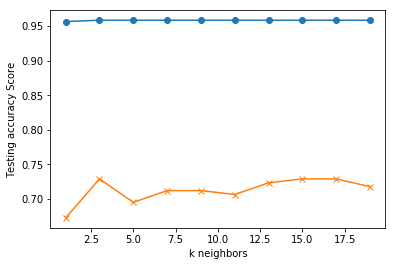

In [9]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()